<a href="https://colab.research.google.com/github/ABZ-Aaron/PartyAffiliation/blob/master/PartyAffiliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Party Affiliation in the United States
#### By Aaron Wright - 1912626
---

The purpose of this analysis is two implement 2 distinct AI algorithms on a selected dataset. Throughout this report I will apply classification techniques to help assess voting habits, and predict whether an indvidiual votes **Democrat** or **Republican**.

## Dataset

This dataset was taken from the UCI Machine Learning Repository ([source]('https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records'))

### Title

1984 United States Congressional Voting Records

### Description


This dataset contains individual votes from each US Congressman on 16 different key votes identified by the CQA.

There are 9 different kinds of votes:

* 3 are "voted for", "paired for", "annouced for". These are simplified to "y" in the dataset. 

* 3 are "voted against", "paired against", and "announced against". These are simplified to "n" in the dataset.

* 3 are "voted present", "voted present to avoid conflict of interest", "did not vote or make position known". These are simplified to "?" in the dataset.

### Attributes

1. party
1. handicapped-infants
1. water-project-cost-sharing
1. adoption-of-the-budget-resolution
1. physician-fee-freeze
1. el-salvador-aid
1. religious-groups-in-schools
1. anti-satellite-test-ban
1. aid-to-nicaraguan-contras
1. mx-missile
1. immigration
1. synfuels-corporation-cutback
1. education-spending
1. superfund-right-to-sue
1. crime
1. duty-free-exports
1. export-administration-act-south-africa

## Imports

In [23]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import plotly.express as px

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

## Data Loading

In [2]:
# Take data from Github repository 
data = 'https://raw.githubusercontent.com/ABZ-Aaron/PartyAffiliation/master/votes_data.csv?token=AND25LFLHJXHZZMCYHIFOMTBVQHBE'

In [3]:
# Column names
cols = ["party", 
        "hc-infants", 
        "water-proj", 
        "budget-reso", 
        "fee-freeze", 
        "salvador-aid", 
        "relig-groups", 
        "anti-satell", 
        "nicar-contras",
        "mx-missile",
        "immigration",
        "syn-cutback",
        "edu-spending",
        "right-to-sue",
        "crime",
        "dutyfree-expo",
        "admin-act-sou"]

In [4]:
# Read in our data
votes = pd.read_csv(data, names = cols)

## Data Exploration

In [5]:
# Check top 3 records
votes.head(3)

,party,hc-infants,water-proj,budget-reso,fee-freeze,salvador-aid,relig-groups,anti-satell,nicar-contras,mx-missile,immigration,syn-cutback,edu-spending,right-to-sue,crime,dutyfree-expo,admin-act-sou
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [6]:
# Check bottom 3 records
votes.tail(3)

,party,hc-infants,water-proj,budget-reso,fee-freeze,salvador-aid,relig-groups,anti-satell,nicar-contras,mx-missile,immigration,syn-cutback,edu-spending,right-to-sue,crime,dutyfree-expo,admin-act-sou
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


In [7]:
# Show information associated with dataframe
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   party          435 non-null    object
 1   hc-infants     435 non-null    object
 2   water-proj     435 non-null    object
 3   budget-reso    435 non-null    object
 4   fee-freeze     435 non-null    object
 5   salvador-aid   435 non-null    object
 6   relig-groups   435 non-null    object
 7   anti-satell    435 non-null    object
 8   nicar-contras  435 non-null    object
 9   mx-missile     435 non-null    object
 10  immigration    435 non-null    object
 11  syn-cutback    435 non-null    object
 12  edu-spending   435 non-null    object
 13  right-to-sue   435 non-null    object
 14  crime          435 non-null    object
 15  dutyfree-expo  435 non-null    object
 16  admin-act-sou  435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


In [8]:
# Return number of unique values by column
votes.nunique()

party            2
hc-infants       3
water-proj       3
budget-reso      3
fee-freeze       3
salvador-aid     3
relig-groups     3
anti-satell      3
nicar-contras    3
mx-missile       3
immigration      3
syn-cutback      3
edu-spending     3
right-to-sue     3
crime            3
dutyfree-expo    3
admin-act-sou    3
dtype: int64

In [9]:
# Return unique values for target variable
votes['party'].unique()

array(['republican', 'democrat'], dtype=object)

In [10]:
# Return unique values from one feature variable
votes['hc-infants'].unique()

array(['n', '?', 'y'], dtype=object)

In [11]:
votes['party'].value_counts(dropna=False)

democrat      267
republican    168
Name: party, dtype: int64

In [12]:
votes['party'].value_counts(normalize=True)

democrat      0.613793
republican    0.386207
Name: party, dtype: float64

In [13]:
fig = px.pie(votes, "party", title = "Rep vs Dem Count")
fig.show()

### Datset Details

* **17** columns 
* **1** target variable
* **16** features
* **435** records
* No **NULL** values
* All of **object** datatype
* Target variable consists of two entries: **republican** and **democrat**
* Feature variables consist of three entries: **y**, **n** and **?**
* The **?** represents values that are neither yes or no.
* More Democrats (**61%**) than Republicans (**39%**) in the dataset.

## Data Cleaning

Let's first convert our feature variables to a numerical type. We'll need this if we run a k-nearest neighbours (KNN) algorithm.

In [14]:
# Replace the **y** and **n** with numerical values
votes.replace({"y" : 1 ,"n" : 0}, inplace = True)

There are a few ways we could deal with our **?** values:

1. Remove rows with ? values
1. Remove columns with ? values
1. Replace ? values with something

We don't want to remove columns as this would remove almost all the features. Replacing could be an option. However, the simplest option would be to remove records containing ?. 

Let's see how many records we have remaining after removing records containing ?.

In [15]:
# Remvoing NA rows
votes.replace('?', np.NaN).dropna()['party'].value_counts()

democrat      124
republican    108
Name: party, dtype: int64

It can be seen that we have significantly fewer records using this approach. The best approach therefore would be to replace the ? values with something. Let's replace them with the `mode` (most common value of each row).

In [16]:
votes.replace("?", np.nan, inplace = True)
votes = votes.T.fillna(votes.iloc[:,1:].astype(float).mode(axis=1)[0]).T

From doing a bit more searching, we can see that one row had a lot of `?` and thus still retains many `NAN` values. We'll just remove this:

In [59]:
votes.iloc[248]

party            1.0
hc-infants       1.0
water-proj       0.0
budget-reso      1.0
fee-freeze       0.0
salvador-aid     0.0
relig-groups     0.0
anti-satell      1.0
nicar-contras    1.0
mx-missile       0.0
immigration      0.0
syn-cutback      1.0
edu-spending     0.0
right-to-sue     0.0
crime            0.0
dutyfree-expo    1.0
admin-act-sou    1.0
Name: 249, dtype: float64

In [55]:
votes = votes.drop(votes.index[248])

Let's confirm we only have 2 unique values for each column and that there are no `nan` values.

In [60]:
votes.nunique()

party            2
hc-infants       2
water-proj       2
budget-reso      2
fee-freeze       2
salvador-aid     2
relig-groups     2
anti-satell      2
nicar-contras    2
mx-missile       2
immigration      2
syn-cutback      2
edu-spending     2
right-to-sue     2
crime            2
dutyfree-expo    2
admin-act-sou    2
dtype: int64

In [61]:
for col in votes:
    print(votes[col].unique())

[0 1]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]


Let's also convert all but the first column to a numeric datatype:

In [62]:
cols = [i for i in votes.columns if i != 'party']
for col in cols:
    votes[col] = votes[col].astype(int)

In [63]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 434
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   party          434 non-null    int64
 1   hc-infants     434 non-null    int64
 2   water-proj     434 non-null    int64
 3   budget-reso    434 non-null    int64
 4   fee-freeze     434 non-null    int64
 5   salvador-aid   434 non-null    int64
 6   relig-groups   434 non-null    int64
 7   anti-satell    434 non-null    int64
 8   nicar-contras  434 non-null    int64
 9   mx-missile     434 non-null    int64
 10  immigration    434 non-null    int64
 11  syn-cutback    434 non-null    int64
 12  edu-spending   434 non-null    int64
 13  right-to-sue   434 non-null    int64
 14  crime          434 non-null    int64
 15  dutyfree-expo  434 non-null    int64
 16  admin-act-sou  434 non-null    int64
dtypes: int64(17)
memory usage: 61.0 KB


Now let's visualise our data using `countplot`. This will give us an idea of the way republicans and democrats are voting on each issue.

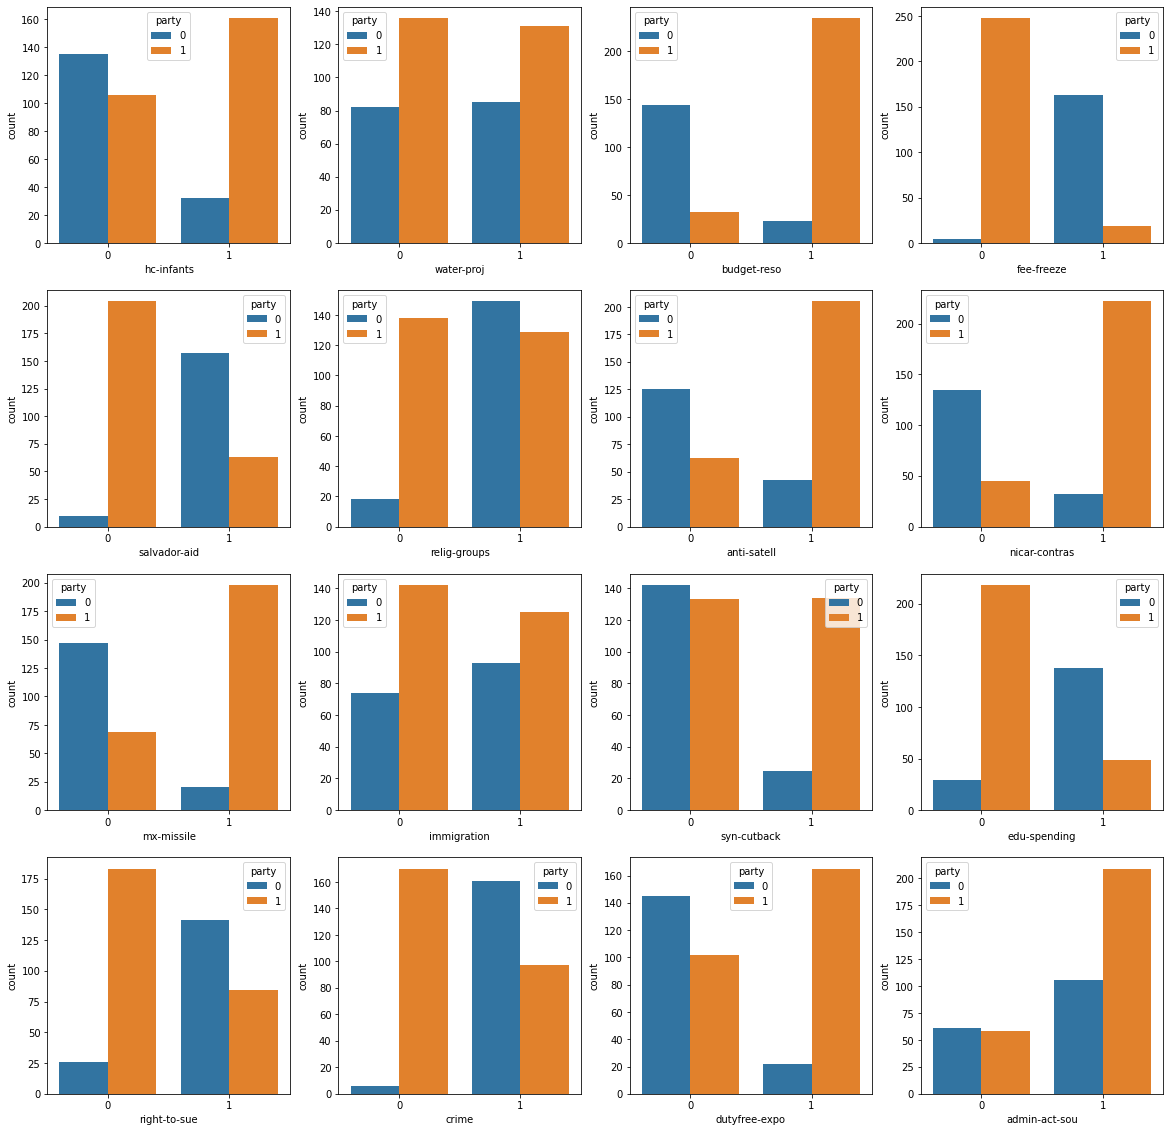

In [64]:
fig, ax = plt.subplots(4,4, figsize=(20, 20))
count = 1
for i in range(4):
  for j in range(4):
    sns.countplot(x = votes.columns[count], hue = 'party', data = votes, ax = ax[i, j])
    count += 1
fig.show()


Let's now convert our target variable `party` to 0's and 1's:

In [65]:
votes['party'] = np.where(votes['party'] == 'democrat', 1, 0)

In [66]:
votes.head()

,party,hc-infants,water-proj,budget-reso,fee-freeze,salvador-aid,relig-groups,anti-satell,nicar-contras,mx-missile,immigration,syn-cutback,edu-spending,right-to-sue,crime,dutyfree-expo,admin-act-sou
0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


In [68]:
# Create arrays for the features and the response variable
Y = votes['party'].values
X = votes.drop('party', axis=1)
X = X.values

# Create a k-NN classifier with 5 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X, Y)

# Predict the labels for the training data X
y_prediction = knn.predict(X)

X_new = pd.DataFrame([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 
                      0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678,
                      0.398044, 0.737995]).transpose()

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


Prediction: [0]


In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

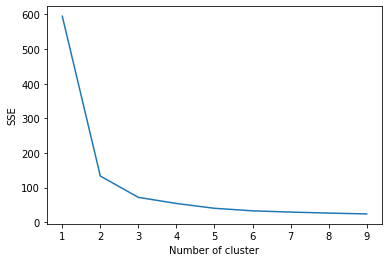

In [24]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [26]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
